In [5]:
# Import Required Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Load CSV into a DataFrame
df = pd.read_csv(r'/Users/jasonteno/Documents/Coding/rOBA test.csv')

In [5]:
df

,Tm,R,rOBA
0,Arizona Diamondbacks,791.0,0.334
1,Athletics,733.0,0.327
2,Atlanta Braves,724.0,0.321
3,Baltimore Orioles,677.0,0.309
4,Boston Red Sox,786.0,0.329
5,Chicago Cubs,793.0,0.334
6,Chicago White Sox,647.0,0.301
7,Cincinnati Reds,716.0,0.315
8,Cleveland Guardians,643.0,0.295
9,Colorado Rockies,597.0,0.302


In [7]:
df_new = df[:-2]

In [7]:
df_new

,Tm,R,rOBA
0,Arizona Diamondbacks,791.0,0.334
1,Athletics,733.0,0.327
2,Atlanta Braves,724.0,0.321
3,Baltimore Orioles,677.0,0.309
4,Boston Red Sox,786.0,0.329
5,Chicago Cubs,793.0,0.334
6,Chicago White Sox,647.0,0.301
7,Cincinnati Reds,716.0,0.315
8,Cleveland Guardians,643.0,0.295
9,Colorado Rockies,597.0,0.302


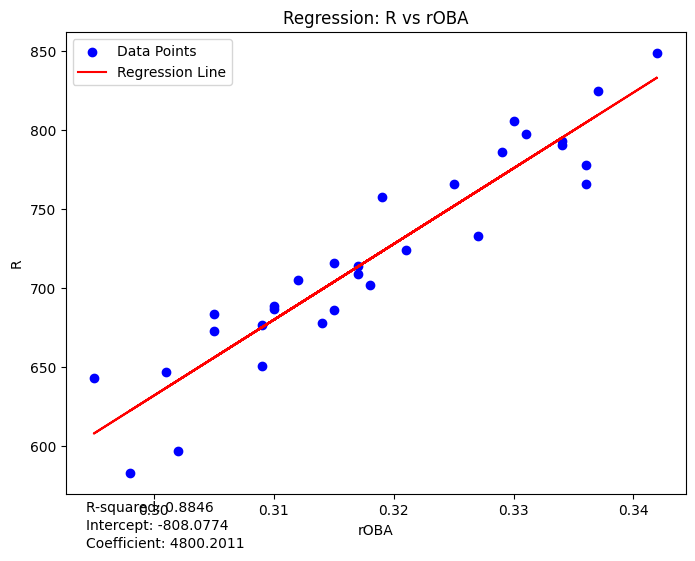

In [10]:
# Import Required Libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define a function to perform linear regression and plot
def plot_regression(df_new, dependent_var, independent_var):
    X = df_new[[independent_var]]  # Independent variable
    y = df_new[dependent_var]  # Dependent variable
    model = LinearRegression()  # Initialize the model
    model.fit(X, y)  # Fit the model
    y_pred = model.predict(X)  # Predict the dependent variable
    r2 = r2_score(y, y_pred)  # Calculate R-squared

    # Plot the scatterplot and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title(f"Regression: {dependent_var} vs {independent_var}")
    plt.xlabel(independent_var)
    plt.ylabel(dependent_var)
    plt.legend()

    # Display regression stats below the plot
    plt.figtext(0.15, 0.02, f"Coefficient: {model.coef_[0]:.4f}", fontsize=10)
    plt.figtext(0.15, 0.05, f"Intercept: {model.intercept_:.4f}", fontsize=10)
    plt.figtext(0.15, 0.08, f"R-squared: {r2:.4f}", fontsize=10)

    plt.show()

# List of independent variables
independent_vars = ['rOBA']

# Generate scatterplots with regression stats for each independent variable
for var in independent_vars:
    plot_regression(df_new, 'R', var)

ValueError: x and y must have same first dimension, but have shapes (32, 1) and (30,)

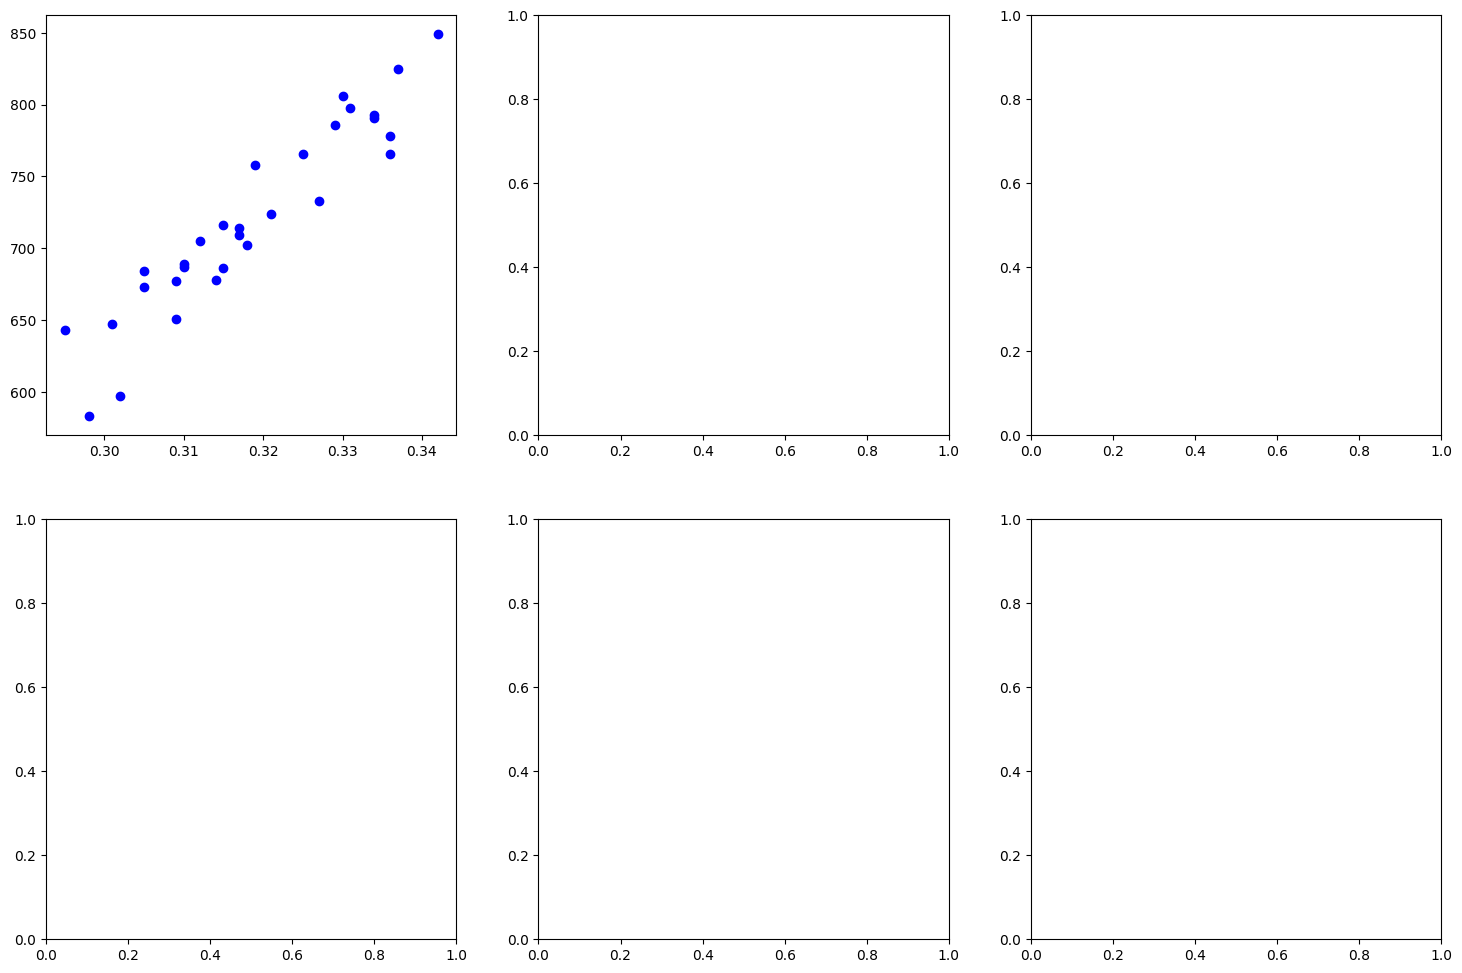

In [8]:
# Import Required Libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Define a function to perform linear regression and return stats
def get_regression_stats(df_new, dependent_var, independent_var):
    X = df_new[[independent_var]]  # Independent variable
    y = df_new[dependent_var]  # Dependent variable
    model = LinearRegression()  # Initialize the model
    model.fit(X, y)  # Fit the model
    y_pred = model.predict(X)  # Predict the dependent variable
    r2 = r2_score(y, y_pred)  # Calculate R-squared
    return model, y_pred, r2

# List of independent variables
independent_vars = ['rOBA']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Generate scatterplots with regression stats for each independent variable
for i, var in enumerate(independent_vars):
    ax = axes[i]
    model, y_pred, r2 = get_regression_stats(df_new, 'R', var)
    X = df[[var]]
    y = df['R']
    
    # Scatterplot and regression line
    ax.scatter(X, y, color='blue', label='Data Points')
    ax.plot(X, y_pred, color='red', label='Regression Line')
    ax.set_title(f"Runs Scored vs {var}", fontsize=14)
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Runs Scored', fontsize=12)
    ax.legend()
    
    # Display regression stats on the plot
    ax.text(0.05, 0.95, f"Coef: {model.coef_[0]:.4f}\nIntercept: {model.intercept_:.4f}\nR²: {r2:.4f}",
            transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()
plt.show()